#NLP 2.Hafta 2.Case

# 📘 NLP Bootcamp – 2. Hafta  
## 🧪 Case Study – Metin Temsilleri

Bu ödevde verilen **DataFrame** içerisindeki metinleri farklı temsiller (representations) ile incelemeniz beklenmektedir.  
Amaç, **aynı verinin farklı yöntemlerle nasıl sayısallaştırıldığını** gözlemlemek ve aralarındaki farkları anlamaktır.  

---

## 🔹 Uygulanacak Metin Temsilleri

### 1. Bag of Words (BOW)
- Metinlerdeki kelimelerin **frekanslarına** dayalı basit bir temsildir.  
- Her kelime bir özellik (feature) olarak kullanılır.  
- Dezavantaj: Kelimeler arasındaki **bağlamsal ilişkiyi** yakalayamaz.  

---

### 2. TF–IDF (Term Frequency – Inverse Document Frequency)
- Kelime frekansını hesaplarken, aynı zamanda kelimenin **tüm corpus’taki önemini** dikkate alır.  
- Çok sık geçen, ancak ayırt edici olmayan kelimelerin ağırlığı düşürülür.  
- Avantaj: Daha **bilgi verici özellikler** çıkarılır.  

---

### 3. N-Gram
- **Ardışık n kelime grubunu** özellik olarak alır.  
- Örneğin:  
  - Unigram → “kitap”  
  - Bigram → “kitap okuyor”  
  - Trigram → “kitap okuyor çocuk”  
- Avantaj: **Kelimeler arası ilişkileri** (bağlamı) daha iyi yakalar.  

---

### 4. Word Embeddings (Word2Vec)
- Kelimeleri **yoğun (dense)** vektörlerle temsil eder.  
- Anlamsal benzerlikleri modelleyebilir.  
- Örneğin: *“kedi”* ve *“köpek”* vektörleri uzayda birbirine yakın çıkar.  
- Yöntemler: **CBOW** ve **Skip-Gram**.  

---


In [15]:
# Veri işleme için pandas kütüphanesi
import pandas as pd

# Doğal dil işleme için NLTK kütüphanesi
import nltk

# NLTK tokenizer (cümle/kelime parçalama) ve stopword (durak kelimeler) listelerini indiriyoruz
nltk.download('punkt_tab')
nltk.download('stopwords')

# Sayısal işlemler için numpy kütüphanesi
import numpy as np

# Kelime parçalama için tokenizer
from nltk.tokenize import word_tokenize

# Stopword (durak kelimeler) listesi için
from nltk.corpus import stopwords

# Metinleri sayısal özelliklere dönüştürmek için:
# CountVectorizer → Bag-of-Words (kelime frekans sayımı)
# TfidfVectorizer → TF-IDF (terim frekansı * ters belge frekansı)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Örnek veri
data = {
    "text": [
        "Manchester United won the match 2-1 after a thrilling game.",
        "The new smartphone model includes AI-based camera features.",
        "The president addressed the nation regarding the new policy.",
        "Regular exercise helps reduce the risk of heart diseases.",
        "The movie received positive reviews from critics and audiences.",
        "Serena Williams announced her retirement from tennis.",
        "Apple is planning to launch its VR headset next year.",
        "Government officials discussed the climate change agreement.",
        "A balanced diet and sleep are essential for good health.",
        "The upcoming film features several Oscar-winning actors.",
        "The team celebrated their championship victory with fans.",
        "Researchers developed a new algorithm for speech recognition.",
        "Parliament passed a new law to support small businesses.",
        "Doctors recommend regular check-ups for early diagnosis.",
        "The actor signed a contract for three upcoming movies."
    ],
    "label": [
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment",
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment",
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment"
    ]
}

In [17]:
# DataFrame oluştur
df = pd.DataFrame(data)

In [9]:
def reviewDf(data):
    # Veri setinin satır ve sütun sayısını (boyutunu) yazdırır
    print("DataFrame'in Boyutu (Shape):")
    print(data.shape)
    print('*' * 50)

    # Veri seti hakkında genel bilgileri (sütun isimleri, tipleri, null sayıları) gösterir
    print("DataFrame'in Genel Bilgileri (Info):")
    print(data.info())
    print('*' * 50)

    # Eksik değer (null) sayısını sütun bazında gösterir
    print("Eksik Değerler (Null Values):")
    print(data.isnull().sum())
    print('*' * 50)

    # İlk 5 satırı gösterir (veriye hızlıca göz atmak için)
    print("İlk 5 Satır (Head):")
    print(data.head())
    print('*' * 50)

    # Son 5 satırı gösterir (sondaki verileri kontrol için)
    print("Son 5 Satır (Tail):")
    print(data.tail())
    print('*' * 50)

    # "label" sütunundaki sınıf dağılımını gösterir
    # Bu özellikle sınıflandırma problemlerinde veri dengesini görmek için önemlidir.
    print("Label Sütunundaki Sınıf Dağılımı (Balance):")
    print(data['label'].value_counts())
    print('*' * 50)

In [10]:
reviewDf(data=df)

DataFrame'in Boyutu (Shape):
(15, 2)
**************************************************
DataFrame'in Genel Bilgileri (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15 non-null     object
 1   label   15 non-null     object
dtypes: object(2)
memory usage: 372.0+ bytes
None
**************************************************
Eksik Değerler (Null Values):
text     0
label    0
dtype: int64
**************************************************
İlk 5 Satır (Head):
                                                text          label
0  Manchester United won the match 2-1 after a th...         Sports
1  The new smartphone model includes AI-based cam...     Technology
2  The president addressed the nation regarding t...       Politics
3  Regular exercise helps reduce the risk of hear...         Health
4  The movie received positive reviews from criti...

#**Veri Ön İşleme Süreci**

In [18]:
import re
import nltk
nltk.download('wordnet')  # Lemmatizer için gerekli WordNet sözlüğünü indiriyoruz
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Lemmatizer (kelimeleri kök forma indirme aracı) başlatılıyor
    lemmatizer = WordNetLemmatizer()

    # 1. Normalizasyon: Tüm harfleri küçük yapıyoruz
    print("Normalize Case")
    text = text.lower()

    # 2. Özel karakter ve rakamların temizlenmesi
    print("Remove Special Chars (numbers, punctuations...)")
    text = re.sub('[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = re.sub('\d', '', text)       # Rakamları kaldır

    # 3. Stopwords temizleme
    print("Remove Stopwords")
    stop_words = set(stopwords.words('english')) - {'won', 'announced', 'received'}
    # Not: Burada bazı kelimeler (won, announced, received) stopword listesinden çıkarılmış
    # Çünkü bu kelimeler problem bağlamında anlamlı olabilir.

    words = word_tokenize(text)
    filtered_words = [kelime for kelime in words if kelime not in stop_words]
    cleaned_text = ' '.join(filtered_words)

    # 4. Lemmatization (Kök forma indirme)
    print("Lemmatization")
    words = word_tokenize(cleaned_text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    cleaned_text = ' '.join(lemmatized_words)

    return cleaned_text

<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2537098945.py:16: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
/tmp/ipython-input-2537098945.py:17: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub('\d', '', text)       # Rakamları kaldır
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**BOW (Bag Of Word)**

In [19]:
text = df['text']

In [20]:
#Preprocess The Text
df['text'] = df['text'].apply(preprocess_text)

Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations...)
Remove Stopwords
Lemmatization
Normalize Case
Remove Special Chars (numbers, punctuations..

In [21]:
df['text']

,text
0,manchester united won match thrilling game
1,new smartphone model includes aibased camera f...
2,president addressed nation regarding new policy
3,regular exercise help reduce risk heart disease
4,movie received positive review critic audience
5,serena williams announced retirement tennis
6,apple planning launch vr headset next year
7,government official discussed climate change a...
8,balanced diet sleep essential good health
9,upcoming film feature several oscarwinning actor


In [27]:
# Metni Vektörleştir
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 92 stored elements and shape (15, 84)>

In [28]:
# Eşsiz Kelimeler
words = vectorizer.get_feature_names_out()
words

array(['actor', 'addressed', 'agreement', 'aibased', 'algorithm',
       'announced', 'apple', 'audience', 'balanced', 'business', 'camera',
       'celebrated', 'championship', 'change', 'checkup', 'climate',
       'contract', 'critic', 'developed', 'diagnosis', 'diet',
       'discussed', 'disease', 'doctor', 'early', 'essential', 'exercise',
       'fan', 'feature', 'film', 'game', 'good', 'government', 'headset',
       'health', 'heart', 'help', 'includes', 'launch', 'law',
       'manchester', 'match', 'model', 'movie', 'nation', 'new', 'next',
       'official', 'oscarwinning', 'parliament', 'passed', 'planning',
       'policy', 'positive', 'president', 'received', 'recognition',
       'recommend', 'reduce', 'regarding', 'regular', 'researcher',
       'retirement', 'review', 'risk', 'serena', 'several', 'signed',
       'sleep', 'small', 'smartphone', 'speech', 'support', 'team',
       'tennis', 'three', 'thrilling', 'united', 'upcoming', 'victory',
       'vr', 'williams',

In [29]:
# Kelimelerin Vektör Temsili
bow_representation = X.toarray()
bow = pd.DataFrame(bow_representation, columns=words)
bow

,actor,addressed,agreement,aibased,algorithm,announced,apple,audience,balanced,business,...,tennis,three,thrilling,united,upcoming,victory,vr,williams,won,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
# Kelimelerin Sıklığı

word_freq = bow.sum(axis=0).sort_values(ascending=False)
word_freq

,0
new,4
actor,2
feature,2
movie,2
regular,2
...,...
victory,1
vr,1
williams,1
won,1


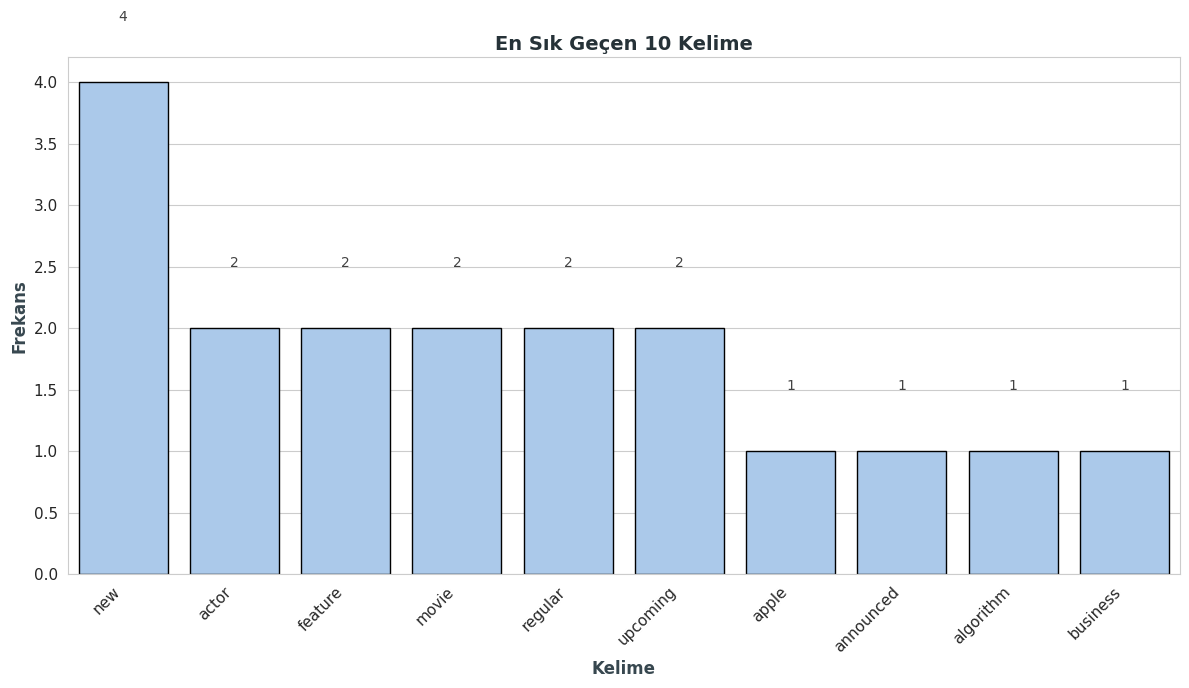

In [31]:
# --- Kelime Frekanslarının Görselleştirilmesi ---
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stilini pastel renklerde ayarlayalım
sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(12, 7))

# İlk 10 kelimenin çubuk grafiği
sns.barplot(
    x=word_freq.index[0:10],
    y=word_freq.values[0:10],
    edgecolor="black"
)

# Türkçe etiketler ve başlık
plt.xlabel("Kelime", fontsize=12, fontweight="bold", color="#37474F")
plt.ylabel("Frekans", fontsize=12, fontweight="bold", color="#37474F")
plt.title("En Sık Geçen 10 Kelime", fontsize=14, fontweight="bold", color="#263238")

# X eksenindeki kelimeleri okunabilir hale getirelim
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)

# Çubukların üstüne değerlerini yazdıralım
for i, v in enumerate(word_freq.values[0:10]):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10, color="#424242")

# Grafiği sıkıştırıp daha estetik hale getirelim
plt.tight_layout()
plt.show()

#**TF-IDF**

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ---- Metinlerden TF-IDF Matrisi Oluşturma ----

# DataFrame'in 'text' sütunundaki metinleri alıyoruz
text = df['text']

# 1) TF-IDF vektörleştirici nesnesini oluşturuyoruz
# Varsayılan parametrelerle: unigram (tek kelime), tüm kelimeler
vectorizer2 = TfidfVectorizer()

# 2) fit_transform() → hem öğrenme (fit) hem de dönüştürme (transform) yapar
# - fit: corpus'taki kelime dağarcığını çıkarır
# - transform: her metni TF-IDF vektörüne çevirir
matrix = vectorizer2.fit_transform(text)

# 3) Çıktı sparse matrix (seyrek matris) şeklindedir
# Boyut: (belge sayısı, benzersiz kelime sayısı)
matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 92 stored elements and shape (15, 84)>

In [33]:
# Kelimeler
words = vectorizer2.get_feature_names_out()
words

array(['actor', 'addressed', 'agreement', 'aibased', 'algorithm',
       'announced', 'apple', 'audience', 'balanced', 'business', 'camera',
       'celebrated', 'championship', 'change', 'checkup', 'climate',
       'contract', 'critic', 'developed', 'diagnosis', 'diet',
       'discussed', 'disease', 'doctor', 'early', 'essential', 'exercise',
       'fan', 'feature', 'film', 'game', 'good', 'government', 'headset',
       'health', 'heart', 'help', 'includes', 'launch', 'law',
       'manchester', 'match', 'model', 'movie', 'nation', 'new', 'next',
       'official', 'oscarwinning', 'parliament', 'passed', 'planning',
       'policy', 'positive', 'president', 'received', 'recognition',
       'recommend', 'reduce', 'regarding', 'regular', 'researcher',
       'retirement', 'review', 'risk', 'serena', 'several', 'signed',
       'sleep', 'small', 'smartphone', 'speech', 'support', 'team',
       'tennis', 'three', 'thrilling', 'united', 'upcoming', 'victory',
       'vr', 'williams',

In [34]:
# IDF Değerleri
idf_values = vectorizer2.idf_
idf_dict = dict(zip(words, idf_values))

print("IDF Değerleri:")
for word, idf in idf_dict.items():
    print(f"{word}: {idf:.4f}")

IDF Değerleri:
actor: 2.6740
addressed: 3.0794
agreement: 3.0794
aibased: 3.0794
algorithm: 3.0794
announced: 3.0794
apple: 3.0794
audience: 3.0794
balanced: 3.0794
business: 3.0794
camera: 3.0794
celebrated: 3.0794
championship: 3.0794
change: 3.0794
checkup: 3.0794
climate: 3.0794
contract: 3.0794
critic: 3.0794
developed: 3.0794
diagnosis: 3.0794
diet: 3.0794
discussed: 3.0794
disease: 3.0794
doctor: 3.0794
early: 3.0794
essential: 3.0794
exercise: 3.0794
fan: 3.0794
feature: 2.6740
film: 3.0794
game: 3.0794
good: 3.0794
government: 3.0794
headset: 3.0794
health: 3.0794
heart: 3.0794
help: 3.0794
includes: 3.0794
launch: 3.0794
law: 3.0794
manchester: 3.0794
match: 3.0794
model: 3.0794
movie: 2.6740
nation: 3.0794
new: 2.1632
next: 3.0794
official: 3.0794
oscarwinning: 3.0794
parliament: 3.0794
passed: 3.0794
planning: 3.0794
policy: 3.0794
positive: 3.0794
president: 3.0794
received: 3.0794
recognition: 3.0794
recommend: 3.0794
reduce: 3.0794
regarding: 3.0794
regular: 2.6740
resea

### **Bir kelime için IDF değeri yüksek ise o döküman için o kelime önemlidir.**

In [36]:
# IDF Değerleri Tablosu
tfidf_df = pd.DataFrame(matrix.toarray(), columns=words)
print(tfidf_df.round(4))

     actor  addressed  agreement  aibased  algorithm  announced  apple  \
0   0.0000     0.0000     0.0000   0.0000     0.0000     0.0000  0.000   
1   0.0000     0.0000     0.0000   0.4001     0.0000     0.0000  0.000   
2   0.0000     0.4267     0.0000   0.0000     0.0000     0.0000  0.000   
3   0.0000     0.0000     0.0000   0.0000     0.0000     0.0000  0.000   
4   0.0000     0.0000     0.0000   0.0000     0.0000     0.0000  0.000   
5   0.0000     0.0000     0.0000   0.0000     0.0000     0.4472  0.000   
6   0.0000     0.0000     0.0000   0.0000     0.0000     0.0000  0.378   
7   0.0000     0.0000     0.4082   0.0000     0.0000     0.0000  0.000   
8   0.0000     0.0000     0.0000   0.0000     0.0000     0.0000  0.000   
9   0.3785     0.0000     0.0000   0.0000     0.0000     0.0000  0.000   
10  0.0000     0.0000     0.0000   0.0000     0.0000     0.0000  0.000   
11  0.0000     0.0000     0.0000   0.0000     0.4267     0.0000  0.000   
12  0.0000     0.0000     0.0000   0.0

#**N-GRAM**

# 🔢 N-Gram Modelleri

**N-Gram**, bir metindeki **ardışık kelime dizilerini** ifade eder.  
Burada **N**, kaç kelimenin birlikte ele alınacağını gösterir (pozitif bir tamsayıdır).  

---

## 🔹 Unigram (1-gram)
- **Tek kelimelik diziler**.  
- Örnek: `"Ben"`, `"kitap"`, `"güzel"`  

---

## 🔹 Bigram (2-gram)
- **İki kelimelik ardışık diziler**.  
- Örnek: `"Ben kitap"`, `"kitap güzel"`  

---

## 🔹 Trigram (3-gram)
- **Üç kelimelik ardışık diziler**.  
- Örnek: `"Ben kitap okuyorum"`, `"kitap çok güzel"`  

---

## 🔹 4-gram
- **Dört kelimelik ardışık diziler**.  
- Örnek: `"Ben kitap okuyorum bugün"`  

---

## 🔹 5-gram
- **Beş kelimelik ardışık diziler**.  
- Örnek: `"Ben kitap okuyorum çok güzel"`  

---

## 📌 Genel Tanım
- **N-Gram:** N adet ardışık kelimeden oluşan diziler.  
- N = 1 → unigram  
- N = 2 → bigram  
- N = 3 → trigram  
- N > 3 → higher-order n-grams  

---

## 📝 Not
- **Unigram** → Tek kelime frekanslarını ölçer, basittir.  
- **Bigram & Trigram** → Kelimeler arası ilişkileri daha iyi yakalar.  
- **Higher-order N-grams (4+, 5+)** → Daha fazla bağlam bilgisi içerir, ancak **seyrek veri (sparse data)** problemi oluşturabilir.  


In [37]:
# Listeyi temizlenmiş metne dönüştür
series = pd.Series(df['text'])
series

,text
0,manchester united won match thrilling game
1,new smartphone model includes aibased camera f...
2,president addressed nation regarding new policy
3,regular exercise help reduce risk heart disease
4,movie received positive review critic audience
5,serena williams announced retirement tennis
6,apple planning launch vr headset next year
7,government official discussed climate change a...
8,balanced diet sleep essential good health
9,upcoming film feature several oscarwinning actor


In [38]:
# Vektörleştiricileri Tanımlayın
from nltk import ngrams

vectorizer_unigram = CountVectorizer(ngram_range=(1, 1))
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))


In [39]:
# ---- Unigram N-gram Vektörleştirme ----
# Unigram: Tek tek kelimeler (n=1)

# 1) Unigram vektörleştirici ile metinleri sayısal hale getiriyoruz
unigram = vectorizer_unigram.fit_transform(series)

# 2) Çıkarılan unigram kelimelerin listesini alıyoruz
unigram_words = vectorizer_unigram.get_feature_names_out()

# 3) Sonuçları DataFrame formatına çeviriyoruz
# - Her satır: bir belge (örneğin bir cümle veya metin parçası)
# - Her sütun: bir unigram (tek kelime)
# - Hücre değeri: o kelimenin belgede geçme frekansı
unigram_df = pd.DataFrame(unigram.toarray(), columns=unigram_words)

# 4) DataFrame’i görüntüleyelim
unigram_df

,actor,addressed,agreement,aibased,algorithm,announced,apple,audience,balanced,business,...,tennis,three,thrilling,united,upcoming,victory,vr,williams,won,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
# Bigrams N-gram

bigrams = vectorizer_bigram.fit_transform(series)
bigrams_words = vectorizer_bigram.get_feature_names_out()
bigrams_df = pd.DataFrame(bigrams.toarray(), columns=bigrams_words)
bigrams_df

,actor signed,addressed nation,aibased camera,algorithm speech,announced retirement,apple planning,balanced diet,camera feature,celebrated championship,championship victory,...,team celebrated,three upcoming,thrilling game,united won,upcoming film,upcoming movie,victory fan,vr headset,williams announced,won match
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
# Trigrams N-gram

trigrams = vectorizer_trigram.fit_transform(series)
trigrams_words = vectorizer_trigram.get_feature_names_out()
trigrams_df = pd.DataFrame(trigrams.toarray(), columns=trigrams_words)
trigrams_df

,actor signed contract,addressed nation regarding,aibased camera feature,algorithm speech recognition,announced retirement tennis,apple planning launch,balanced diet sleep,celebrated championship victory,championship victory fan,checkup early diagnosis,...,sleep essential good,smartphone model includes,support small business,team celebrated championship,three upcoming movie,united won match,upcoming film feature,vr headset next,williams announced retirement,won match thrilling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#**Word Embeddings (Word2Vec)**

In [1]:
# Yüksek boyutlu vektörleri 2B/3B düzleme indirgemek ve görselleştirmek için t-SNE aracını içe aktarır
from sklearn.manifold import TSNE

!pip install gensim

# Word2Vec gibi dağıtımsal kelime temsilleri (word embeddings) eğitmek/çağırmak için model sınıfını içe aktarır
from gensim.models import Word2Vec

# Basit ve güvenli bir ön işleme: metni küçük harfe çevirir, noktalama/özel karakterleri temizler ve tokenlara böler
from gensim.utils import simple_preprocess

In [3]:
import pandas as pd

# Örnek veri
data = {
    "text": [
        "Manchester United won the match 2-1 after a thrilling game.",
        "The new smartphone model includes AI-based camera features.",
        "The president addressed the nation regarding the new policy.",
        "Regular exercise helps reduce the risk of heart diseases.",
        "The movie received positive reviews from critics and audiences.",
        "Serena Williams announced her retirement from tennis.",
        "Apple is planning to launch its VR headset next year.",
        "Government officials discussed the climate change agreement.",
        "A balanced diet and sleep are essential for good health.",
        "The upcoming film features several Oscar-winning actors.",
        "The team celebrated their championship victory with fans.",
        "Researchers developed a new algorithm for speech recognition.",
        "Parliament passed a new law to support small businesses.",
        "Doctors recommend regular check-ups for early diagnosis.",
        "The actor signed a contract for three upcoming movies."
    ],
    "label": [
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment",
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment",
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment"
    ]
}

# DataFrame oluştur
df = pd.DataFrame(data)
df

,text,label
0,Manchester United won the match 2-1 after a th...,Sports
1,The new smartphone model includes AI-based cam...,Technology
2,The president addressed the nation regarding t...,Politics
3,Regular exercise helps reduce the risk of hear...,Health
4,The movie received positive reviews from criti...,Entertainment
5,Serena Williams announced her retirement from ...,Sports
6,Apple is planning to launch its VR headset nex...,Technology
7,Government officials discussed the climate cha...,Politics
8,A balanced diet and sleep are essential for go...,Health
9,The upcoming film features several Oscar-winni...,Entertainment


In [4]:
rows = df['text'].tolist()
rows

['Manchester United won the match 2-1 after a thrilling game.',
 'The new smartphone model includes AI-based camera features.',
 'The president addressed the nation regarding the new policy.',
 'Regular exercise helps reduce the risk of heart diseases.',
 'The movie received positive reviews from critics and audiences.',
 'Serena Williams announced her retirement from tennis.',
 'Apple is planning to launch its VR headset next year.',
 'Government officials discussed the climate change agreement.',
 'A balanced diet and sleep are essential for good health.',
 'The upcoming film features several Oscar-winning actors.',
 'The team celebrated their championship victory with fans.',
 'Researchers developed a new algorithm for speech recognition.',
 'Parliament passed a new law to support small businesses.',
 'Doctors recommend regular check-ups for early diagnosis.',
 'The actor signed a contract for three upcoming movies.']

In [5]:
# Cümleleri temizle

cleaned_sentences = [simple_preprocess(row) for row in rows]
cleaned_sentences

[['manchester', 'united', 'won', 'the', 'match', 'after', 'thrilling', 'game'],
 ['the',
  'new',
  'smartphone',
  'model',
  'includes',
  'ai',
  'based',
  'camera',
  'features'],
 ['the',
  'president',
  'addressed',
  'the',
  'nation',
  'regarding',
  'the',
  'new',
  'policy'],
 ['regular',
  'exercise',
  'helps',
  'reduce',
  'the',
  'risk',
  'of',
  'heart',
  'diseases'],
 ['the',
  'movie',
  'received',
  'positive',
  'reviews',
  'from',
  'critics',
  'and',
  'audiences'],
 ['serena', 'williams', 'announced', 'her', 'retirement', 'from', 'tennis'],
 ['apple',
  'is',
  'planning',
  'to',
  'launch',
  'its',
  'vr',
  'headset',
  'next',
  'year'],
 ['government',
  'officials',
  'discussed',
  'the',
  'climate',
  'change',
  'agreement'],
 ['balanced',
  'diet',
  'and',
  'sleep',
  'are',
  'essential',
  'for',
  'good',
  'health'],
 ['the',
  'upcoming',
  'film',
  'features',
  'several',
  'oscar',
  'winning',
  'actors'],
 ['the',
  'team',
  'c

In [6]:
# Modeli Oluşturma ve Eğitme
Word2vec_model = Word2Vec(sentences=cleaned_sentences,
                 vector_size=100, # kelime vektörlerin uzunluğu
                 window=5, # bağlamı yakalamak için, ortadaki kelimenin sağından ve solundan 5 kelime alınacak
                 min_count=1, # corpusta 5ten fazla geçen kelimeler alınacak # Küçük df küçült
                 sg=1 # skip-gram ile eğitilecek, defaultu Continuous bag of words (CBOW)
                 )

In [7]:
# Kelimelerin vektörlerini gör
Word2vec_model.wv['new']

array([-8.6291712e-03,  3.7302468e-03,  5.1899506e-03,  5.7405215e-03,
        7.4876812e-03, -6.2197805e-03,  1.1271557e-03,  6.1070039e-03,
       -2.8566779e-03, -6.1852210e-03, -4.2327502e-04, -8.4324451e-03,
       -5.6037321e-03,  7.1410146e-03,  3.3772157e-03,  7.2195260e-03,
        6.8125133e-03,  7.5341924e-03, -3.8280713e-03, -6.3968066e-04,
        2.3526205e-03, -4.4772821e-03,  8.3787404e-03, -9.8673394e-03,
        6.7495098e-03,  2.9212278e-03, -4.9594478e-03,  4.3719057e-03,
       -1.7487450e-03,  6.7119091e-03,  9.9928314e-03, -4.3902812e-03,
       -5.7144184e-04, -5.7285507e-03,  3.8112085e-03,  2.7963470e-03,
        6.9122813e-03,  6.1033270e-03,  9.5578833e-03,  9.2161195e-03,
        7.8729410e-03, -7.0050894e-03, -9.1470964e-03, -3.7421938e-04,
       -3.0937879e-03,  7.9061519e-03,  5.9020077e-03, -1.5306891e-03,
        1.5360923e-03,  1.8046713e-03,  7.8194132e-03, -9.5490003e-03,
       -1.8079790e-04,  3.4746593e-03, -9.3826465e-04,  8.4012216e-03,
      

In [8]:
# En benzer kelimeyi bul

Word2vec_model.wv.most_similar('new', topn=2)

[('diseases', 0.19086596369743347), ('tennis', 0.18980902433395386)]

In [9]:
#  Modeli boşalt

Word2vec_model.save('word2vec.model')

# Modeli içe aktarın
Word2vec_model = Word2Vec.load('word2vec.model')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def closestwords_tsneplot(model, word, topn=10):
    # --- Vektör ve Etiketleri Hazırlama ---
    vec_size = model.wv.vector_size  # modelin vektör boyutunu otomatik al
    word_vectors = np.empty((0, vec_size))
    word_labels = [word]

    # Hedef kelimenin en yakın topn komşusunu bul
    close_words = model.wv.most_similar(word, topn=topn)

    # İlk olarak hedef kelimeyi ekle
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)

    # Sonra yakın kelimeleri ekle
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)

    # --- Boyut Azaltma (t-SNE) ---
    tsne = TSNE(
        random_state=42,
        perplexity=min(30, len(word_vectors) - 1),
        n_iter=1500,
        init='pca'
    )
    Y = tsne.fit_transform(word_vectors)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # --- Profesyonel Pastel Görselleştirme ---
    sns.set_style("whitegrid")
    sns.set_palette("pastel")

    plt.figure(figsize=(10, 7), dpi=120)

    # Hedef kelime (mavi, büyük nokta)
    plt.scatter(x_coords[0], y_coords[0],
                c="#6FA8DC", s=200, edgecolors="white", linewidths=2,
                label=f"Hedef: {word}")

    # Benzer kelimeler (pastel renkler)
    plt.scatter(x_coords[1:], y_coords[1:],
                c=sns.color_palette("pastel", len(word_labels)-1),
                s=120, edgecolors="white", linewidths=1.5)

    # Etiketleri ekle
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label,
                     xy=(x, y), xytext=(5, 3),
                     textcoords='offset points',
                     fontsize=11,
                     fontweight='bold' if label == word else 'normal',
                     color="#263238" if label == word else "#424242",
                     bbox=dict(boxstyle="round,pad=0.3",
                               fc="white", ec="gray", alpha=0.7))

    # Başlık ve eksenler
    plt.title(f"'{word}' ve En Yakın {topn} Kelime (t-SNE ile 2B)", fontsize=14, fontweight="bold", color="#212121")
    plt.xlabel("t-SNE Bileşeni 1", fontsize=12, color="#37474F")
    plt.ylabel("t-SNE Bileşeni 2", fontsize=12, color="#37474F")
    plt.legend(frameon=True, loc="best")

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


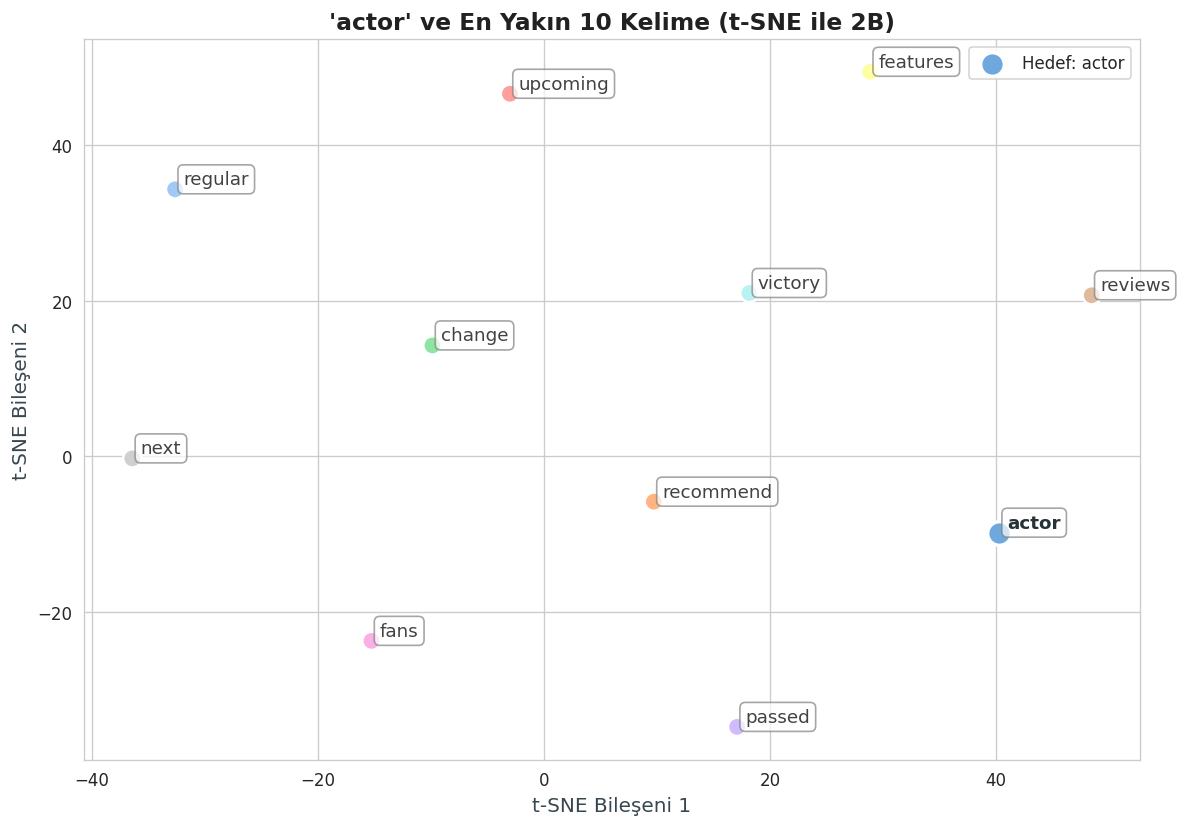

In [11]:
closestwords_tsneplot(Word2vec_model,'actor')